In [67]:
#HASAN KAAN EKİNCİ - 210446033

#AHMAD ALSHISHANI - 220446607

In [7]:
#paketlerin yüklenmesi
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#csv dosyasının upload edilmesi
df = pd.read_csv("dataset.csv")

In [9]:
#ilk 10 satıra bakış 
df.head()

,Age,Area,CreditAvlb,Firsthand,FloorCount,FloorNumber,Frontage,Fuel,Furniture,MaintenanceFee,Price,Room,Town,Heating_num
0,0,240,2,2,15,15.0,1,3,0,250,1200000,5,6,7
1,2,190,2,1,11,9.0,0,3,0,0,799000,5,7,7
2,3,300,2,1,3,3.0,1,3,0,60,448000,5,7,5
3,0,412,2,1,14,13.0,1,3,0,0,975000,6,5,5
4,0,206,2,1,14,10.0,1,3,0,0,590000,5,5,5


In [10]:
#veriyi tanıma
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21988 entries, 0 to 21987
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             21988 non-null  int64  
 1   Area            21988 non-null  int64  
 2   CreditAvlb      21988 non-null  int64  
 3   Firsthand       21988 non-null  int64  
 4   FloorCount      21988 non-null  int64  
 5   FloorNumber     21988 non-null  float64
 6   Frontage        21988 non-null  int64  
 7   Fuel            21988 non-null  int64  
 8   Furniture       21988 non-null  int64  
 9   MaintenanceFee  21988 non-null  int64  
 10  Price           21988 non-null  int64  
 11  Room            21988 non-null  int64  
 12  Town            21988 non-null  int64  
 13  Heating_num     21988 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 2.3 MB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,21988.0,11.686738,11.088045,0.0,2.0,10.0,19.0,64.0
Area,21988.0,151.118838,59.824220,25.0,115.0,135.0,175.0,711.0
CreditAvlb,21988.0,1.971348,0.219356,0.0,2.0,2.0,2.0,2.0
Firsthand,21988.0,1.264190,0.447972,0.0,1.0,1.0,2.0,2.0
FloorCount,21988.0,6.313080,5.820759,1.0,3.0,4.0,7.0,50.0
FloorNumber,21988.0,3.171207,3.587593,-1.0,1.0,2.0,4.0,24.0
Frontage,21988.0,0.770466,0.420543,0.0,1.0,1.0,1.0,1.0
Fuel,21988.0,2.991313,0.139413,0.0,3.0,3.0,3.0,3.0
Furniture,21988.0,0.022876,0.149512,0.0,0.0,0.0,0.0,1.0
MaintenanceFee,21988.0,72.156585,127.627317,0.0,0.0,30.0,75.0,2500.0


<AxesSubplot:ylabel='FloorCount'>

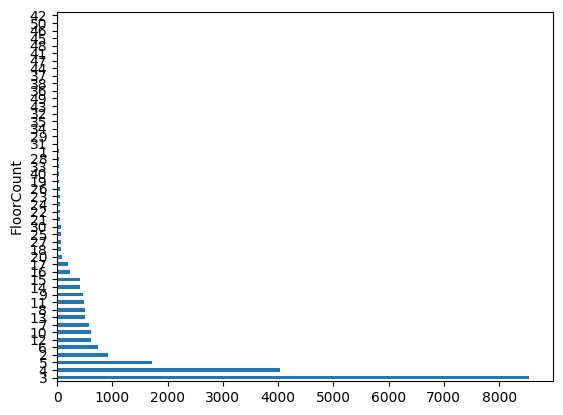

In [12]:
df.FloorCount.value_counts().plot.barh()

In [13]:
df.FloorCount.value_counts().T

FloorCount
3     8549
4     4030
5     1720
2      931
6      734
12     621
10     618
7      578
13     510
8      506
11     495
9      475
14     418
15     408
16     231
17     199
20      84
18      77
27      72
25      72
30      63
21      59
22      49
24      49
23      48
26      46
19      44
40      36
33      36
28      34
1       31
31      21
29      19
34      18
35      17
32      16
43      13
49      12
36       7
38       7
37       7
44       6
47       6
41       4
48       4
45       3
46       3
50       1
42       1
Name: count, dtype: int64

In [60]:
#Dataframe'de hiç boş değer yok 
df.isnull().sum()

Age               0
Area              0
CreditAvlb        0
Firsthand         0
FloorCount        0
FloorNumber       0
Frontage          0
Fuel              0
Furniture         0
MaintenanceFee    0
Price             0
Room              0
Town              0
Heating_num       0
dtype: int64

In [14]:
#ML algoritmalarının import edilmesi
import pandas as pd
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn import model_selection

In [15]:
df = df[["Town","Age","Area","Firsthand","FloorNumber","Fuel","Furniture","Price","Room","Heating_num"]]

In [16]:
df

,Town,Age,Area,Firsthand,FloorNumber,Fuel,Furniture,Price,Room,Heating_num
0,6,0,240,2,15.00,3,0,1200000,5,7
1,7,2,190,1,9.00,3,0,799000,5,7
2,7,3,300,1,3.00,3,0,448000,5,5
3,5,0,412,1,13.00,3,0,975000,6,5
4,5,0,206,1,10.00,3,0,590000,5,5
...,...,...,...,...,...,...,...,...,...,...
21983,9,22,120,2,3.00,3,0,389000,4,5
21984,9,35,110,2,0.25,3,0,375000,3,6
21985,6,5,155,1,4.00,3,0,380000,5,5
21986,9,20,180,1,1.00,3,0,550000,5,5


In [17]:
#Bağımlı ve bağımsız değişkenleri ayırma
y=df.loc[:, 'Price']
X=df.loc[:, df.columns != 'Price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
#GridSearchCV
params = {"colsample_bytree":[0.4,0.5,0.6],
         "learning_rate":[0.01,0.02,0.09],
         "max_depth":[8,12,14],
         "n_estimators":[100,250]}
xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv = 10, n_jobs = -1, verbose = 2)
grid.fit(X_train, y_train)


Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6],
                         'learning_rate': [0.01, 0.02, 0.09],
                         'max_depth': [8, 12, 14], 'n_estimators': [100, 250]},
             verbose=2)

In [20]:
#en uygun parametreler
grid.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.02,
 'max_depth': 8,
 'n_estimators': 250}

In [61]:
#Parametrelerimizi giriyoruz
xgb1 = XGBRegressor(colsample_bytree = 0.6, learning_rate = 0.05, max_depth = 8, n_estimators = 500)

In [62]:
#Modelimizi eğitiyoruz
model_xgb = xgb1.fit(X_train,y_train)

In [63]:
#Tahmin
model_xgb.predict(X_test)[0:10] 


array([ 173458.36, 1042515.25,  383915.56,  172676.62,  237118.73,
        272409.53,  750026.44,  705139.25,  241549.83,  255793.36],
      dtype=float32)

In [64]:
y_test[0:10]

10500    166000
4290     870000
4972     325000
2641     125000
18160    260000
7459     205000
19337    750000
4178     749000
13300    305000
7402     243000
Name: Price, dtype: int64

In [65]:
#Skorumuz
model_xgb.score(X_test,y_test)

0.7406658172017961

In [66]:
#Doğrulanmış hata skorumuz
np.sqrt(-1*(cross_val_score(model_xgb, X_test, y_test, cv=10, scoring='neg_mean_squared_error'))).mean()

172534.37573164844

In [42]:
#Modeldeki parametrelerin önemi
importance = pd.DataFrame({"Importance": model_xgb.feature_importances_},
                         index=X_train.columns)

In [43]:
importance

,Importance
Town,0.205048
Age,0.057681
Area,0.263128
Firsthand,0.041711
FloorNumber,0.076684
Fuel,0.009013
Furniture,0.020721
Room,0.158889
Heating_num,0.167127
